In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model

np.random.seed(123)
tf.random.set_seed(123)

In [3]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler

In [4]:
df0 = pd.read_csv('Crude Oil Prices.csv', index_col='Date', parse_dates=True)

In [5]:
df = df0[['Close/Last']].copy()

In [6]:
df.reset_index(level=0, inplace=True)
df=df.sort_values(by='Date')
df=df.set_index('Date')

In [7]:
df.head()

,Close/Last
Date,
2011-08-08,81.31
2011-08-09,79.30
2011-08-10,82.89
2011-08-11,85.72
2011-08-12,85.38


In [8]:
df['LogClose/Last'] = np.log(df['Close/Last'])

c:\users\hp envy\appdata\local\programs\python\python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [9]:
df['DiffLogClose/Last'] = df['LogClose/Last'].diff()

In [10]:
Ntest = 365
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

In [11]:
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train[['DiffLogClose/Last']])
test_scaled = scaler.transform(test[['DiffLogClose/Last']])

In [12]:
len(train_scaled)

2194

In [13]:
type(test_scaled)

numpy.ndarray

In [14]:
df.shape

(2559, 3)

In [15]:
df.head()

,Close/Last,LogClose/Last,DiffLogClose/Last
Date,,,
2011-08-08,81.31,4.398269,NaN
2011-08-09,79.30,4.373238,-0.025031
2011-08-10,82.89,4.417514,0.044276
2011-08-11,85.72,4.451086,0.033572
2011-08-12,85.38,4.447112,-0.003974


In [16]:
# boolean series to index df rows
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

In [17]:
train.shape

(2194, 3)

In [18]:
train.index[-1]

Timestamp('2020-02-26 00:00:00')

In [19]:
t = np.concatenate((train_scaled, test_scaled))

In [20]:
df.loc[train_idx, 'ScaledLogReturn'] = train_scaled.flatten()
df.loc[test_idx, 'ScaledLogReturn'] = test_scaled.flatten()

In [21]:
df.head()

,Close/Last,LogClose/Last,DiffLogClose/Last,ScaledLogReturn
Date,,,,
2011-08-08,81.31,4.398269,NaN,NaN
2011-08-09,79.30,4.373238,-0.025031,-1.191010
2011-08-10,82.89,4.417514,0.044276,2.137786
2011-08-11,85.72,4.451086,0.033572,1.623651
2011-08-12,85.38,4.447112,-0.003974,-0.179671


In [22]:
df1 = df.dropna()

In [23]:
df1.shape

(2556, 4)

In [24]:
# Make supervised dataset
series = df['ScaledLogReturn'].dropna().to_numpy()

T = 91
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (2465, 91) Y.shape (2465,)


In [25]:
Xtrain, Ytrain = X[Ntest:], Y[Ntest:]
Xtest, Ytest = X[:Ntest], Y[:Ntest]

In [26]:
# Basic ANN
i = Input(shape=(T,))
x = Dense(32, activation='relu')(i)
x = Dense(1)(x)
model = Model(i, x)

In [27]:
model.compile(
  loss='mse',
  optimizer='adam',
)

In [28]:
r = model.fit(
  Xtrain,
  Ytrain,
  epochs=600,
  validation_data=(Xtest, Ytest)
)

Epoch 1/600
66/66 [==============================] - 1s 9ms/step - loss: 5.4760 - val_loss: 1.0242
Epoch 2/600
66/66 [==============================] - 0s 5ms/step - loss: 3.2341 - val_loss: 0.8460
Epoch 3/600
66/66 [==============================] - 0s 5ms/step - loss: 2.0150 - val_loss: 0.7742
Epoch 4/600
66/66 [==============================] - 0s 5ms/step - loss: 1.8310 - val_loss: 0.7352
Epoch 5/600
66/66 [==============================] - 0s 5ms/step - loss: 1.6550 - val_loss: 0.7136
Epoch 6/600
66/66 [==============================] - 0s 5ms/step - loss: 1.4598 - val_loss: 0.7121
Epoch 7/600
66/66 [==============================] - 0s 5ms/step - loss: 1.5826 - val_loss: 0.7082
Epoch 8/600
66/66 [==============================] - 0s 5ms/step - loss: 1.4797 - val_loss: 0.7031
Epoch 9/600
66/66 [==============================] - 0s 5ms/step - loss: 1.5333 - val_loss: 0.7030
Epoch 10/600
66/66 [==============================] - 0s 5ms/step - loss: 1.3637 - val_loss: 0.6963
Epoch 11/

66/66 [==============================] - 0s 5ms/step - loss: 0.2860 - val_loss: 0.9082
Epoch 84/600
66/66 [==============================] - 0s 5ms/step - loss: 0.2466 - val_loss: 0.9277
Epoch 85/600
66/66 [==============================] - 0s 5ms/step - loss: 0.3045 - val_loss: 0.9051
Epoch 86/600
66/66 [==============================] - 0s 5ms/step - loss: 0.2746 - val_loss: 0.9214
Epoch 87/600
66/66 [==============================] - 0s 5ms/step - loss: 0.2928 - val_loss: 0.9215
Epoch 88/600
66/66 [==============================] - 0s 5ms/step - loss: 0.2191 - val_loss: 0.9238
Epoch 89/600
66/66 [==============================] - 0s 5ms/step - loss: 0.2567 - val_loss: 0.9202
Epoch 90/600
66/66 [==============================] - 0s 5ms/step - loss: 0.2669 - val_loss: 0.9256
Epoch 91/600
66/66 [==============================] - 0s 5ms/step - loss: 0.2124 - val_loss: 0.9163
Epoch 92/600
66/66 [==============================] - 0s 5ms/step - loss: 0.2000 - val_loss: 0.9461
Epoch 93/600


66/66 [==============================] - 0s 5ms/step - loss: 0.1468 - val_loss: 1.0218
Epoch 165/600
66/66 [==============================] - 0s 5ms/step - loss: 0.2112 - val_loss: 0.9985
Epoch 166/600
66/66 [==============================] - 0s 5ms/step - loss: 0.1274 - val_loss: 1.0354
Epoch 167/600
66/66 [==============================] - 0s 5ms/step - loss: 0.1389 - val_loss: 1.0075
Epoch 168/600
66/66 [==============================] - 0s 5ms/step - loss: 0.1406 - val_loss: 1.0377
Epoch 169/600
66/66 [==============================] - 0s 5ms/step - loss: 0.1677 - val_loss: 1.0204
Epoch 170/600
66/66 [==============================] - 0s 5ms/step - loss: 0.1951 - val_loss: 1.0131
Epoch 171/600
66/66 [==============================] - 0s 5ms/step - loss: 0.1444 - val_loss: 1.0207
Epoch 172/600
66/66 [==============================] - 0s 5ms/step - loss: 0.1480 - val_loss: 1.0318
Epoch 173/600
66/66 [==============================] - 0s 5ms/step - loss: 0.1510 - val_loss: 1.0327
Epoc

66/66 [==============================] - 0s 5ms/step - loss: 0.1405 - val_loss: 1.0597
Epoch 246/600
66/66 [==============================] - 1s 9ms/step - loss: 0.1262 - val_loss: 1.0405
Epoch 247/600
66/66 [==============================] - 0s 6ms/step - loss: 0.1074 - val_loss: 1.0719
Epoch 248/600
66/66 [==============================] - 0s 5ms/step - loss: 0.1374 - val_loss: 1.0465
Epoch 249/600
66/66 [==============================] - 0s 5ms/step - loss: 0.1717 - val_loss: 1.0513
Epoch 250/600
66/66 [==============================] - 0s 5ms/step - loss: 0.1596 - val_loss: 1.0407
Epoch 251/600
66/66 [==============================] - 0s 5ms/step - loss: 0.1251 - val_loss: 1.0843
Epoch 252/600
66/66 [==============================] - 0s 7ms/step - loss: 0.1116 - val_loss: 1.0469
Epoch 253/600
66/66 [==============================] - 0s 5ms/step - loss: 0.1023 - val_loss: 1.0845
Epoch 254/600
66/66 [==============================] - 0s 5ms/step - loss: 0.1348 - val_loss: 1.0273
Epoc

66/66 [==============================] - 0s 5ms/step - loss: 0.0974 - val_loss: 1.0890
Epoch 327/600
66/66 [==============================] - 0s 4ms/step - loss: 0.1372 - val_loss: 1.0846
Epoch 328/600
66/66 [==============================] - 0s 4ms/step - loss: 0.0958 - val_loss: 1.0965
Epoch 329/600
66/66 [==============================] - 0s 4ms/step - loss: 0.1230 - val_loss: 1.0879
Epoch 330/600
66/66 [==============================] - 0s 7ms/step - loss: 0.1303 - val_loss: 1.0751
Epoch 331/600
66/66 [==============================] - 0s 6ms/step - loss: 0.1129 - val_loss: 1.1015
Epoch 332/600
66/66 [==============================] - 0s 6ms/step - loss: 0.1260 - val_loss: 1.0966
Epoch 333/600
66/66 [==============================] - 0s 6ms/step - loss: 0.1114 - val_loss: 1.0732
Epoch 334/600
66/66 [==============================] - 1s 8ms/step - loss: 0.1156 - val_loss: 1.0878
Epoch 335/600
66/66 [==============================] - 0s 7ms/step - loss: 0.1016 - val_loss: 1.0766
Epoc

66/66 [==============================] - 0s 4ms/step - loss: 0.1094 - val_loss: 1.1075
Epoch 408/600
66/66 [==============================] - 0s 4ms/step - loss: 0.0826 - val_loss: 1.1074
Epoch 409/600
66/66 [==============================] - 0s 4ms/step - loss: 0.1308 - val_loss: 1.1094
Epoch 410/600
66/66 [==============================] - 0s 5ms/step - loss: 0.1207 - val_loss: 1.1052
Epoch 411/600
66/66 [==============================] - 0s 4ms/step - loss: 0.1204 - val_loss: 1.1067
Epoch 412/600
66/66 [==============================] - 0s 4ms/step - loss: 0.1109 - val_loss: 1.1069
Epoch 413/600
66/66 [==============================] - 0s 5ms/step - loss: 0.0814 - val_loss: 1.1060
Epoch 414/600
66/66 [==============================] - 0s 5ms/step - loss: 0.0760 - val_loss: 1.0964
Epoch 415/600
66/66 [==============================] - 0s 4ms/step - loss: 0.0915 - val_loss: 1.0841
Epoch 416/600
66/66 [==============================] - 0s 5ms/step - loss: 0.0642 - val_loss: 1.1019
Epoc

Epoch 488/600
66/66 [==============================] - 0s 5ms/step - loss: 0.0802 - val_loss: 1.0906
Epoch 489/600
66/66 [==============================] - 2s 33ms/step - loss: 0.0737 - val_loss: 1.1059
Epoch 490/600
66/66 [==============================] - 0s 5ms/step - loss: 0.0641 - val_loss: 1.0935
Epoch 491/600
66/66 [==============================] - 0s 5ms/step - loss: 0.0688 - val_loss: 1.1122
Epoch 492/600
66/66 [==============================] - 2s 33ms/step - loss: 0.0757 - val_loss: 1.1042
Epoch 493/600
66/66 [==============================] - 0s 4ms/step - loss: 0.0805 - val_loss: 1.1088
Epoch 494/600
66/66 [==============================] - 0s 4ms/step - loss: 0.0684 - val_loss: 1.1146
Epoch 495/600
66/66 [==============================] - 0s 4ms/step - loss: 0.0876 - val_loss: 1.1040
Epoch 496/600
66/66 [==============================] - 2s 32ms/step - loss: 0.0786 - val_loss: 1.1187
Epoch 497/600
66/66 [==============================] - 0s 5ms/step - loss: 0.0866 - val_

66/66 [==============================] - 0s 5ms/step - loss: 0.0907 - val_loss: 1.1162
Epoch 569/600
66/66 [==============================] - 7s 102ms/step - loss: 0.0897 - val_loss: 1.1214
Epoch 570/600
66/66 [==============================] - 0s 6ms/step - loss: 0.0898 - val_loss: 1.0915
Epoch 571/600
66/66 [==============================] - 7s 101ms/step - loss: 0.0856 - val_loss: 1.1212
Epoch 572/600
66/66 [==============================] - 1s 8ms/step - loss: 0.1411 - val_loss: 1.1065
Epoch 573/600
66/66 [==============================] - 7s 104ms/step - loss: 0.1042 - val_loss: 1.0966
Epoch 574/600
66/66 [==============================] - ETA: 0s - loss: 0.096 - 0s 6ms/step - loss: 0.0940 - val_loss: 1.1061
Epoch 575/600
66/66 [==============================] - 6s 96ms/step - loss: 0.0773 - val_loss: 1.1035
Epoch 576/600
66/66 [==============================] - 1s 10ms/step - loss: 0.0785 - val_loss: 1.0971
Epoch 577/600
66/66 [==============================] - 7s 105ms/step - lo

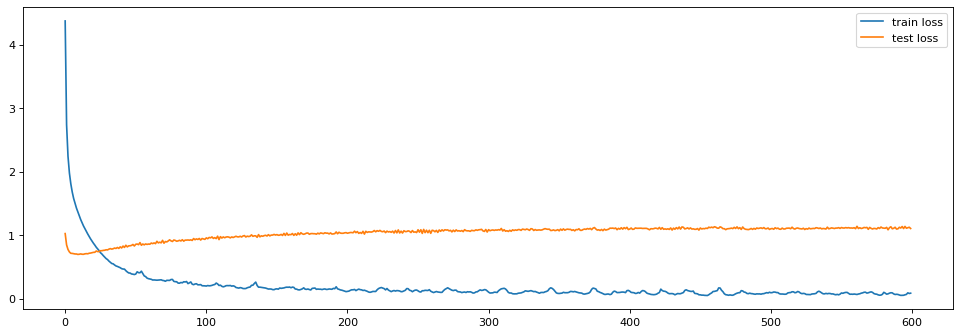

In [29]:
figure(figsize=(15,5), dpi=80)
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend();
plt.savefig('ann_error_plot.png')



In [30]:
train_idx[:T+1] = False # first T+1 values are not predictable

In [31]:
train_idx

array([False, False, False, ..., False, False, False])

In [32]:
Ptrain = model.predict(Xtrain)
Ptest = model.predict(Xtest)

Ptrain = scaler.inverse_transform(Ptrain).flatten()
Ptest = scaler.inverse_transform(Ptest).flatten()

In [33]:
len(Ptrain)

2100

In [34]:
Ptrain= np.concatenate(([np.nan, np.nan], Ptrain))

In [35]:
df.shape

(2559, 4)

In [36]:
a = np.array([0,0,0,0,0,0,0,0,0,0,0,])

In [37]:
P = np.concatenate(( Ptrain,[0,0], Ptest, a))

In [38]:
# Store diff predictions
df.loc[train_idx, 'Diff ANN Train Prediction'] = Ptrain
df.loc[test_idx, 'Diff ANN Test Prediction'] = Ptest

In [39]:
df.head(30)

,Close/Last,LogClose/Last,DiffLogClose/Last,ScaledLogReturn,Diff ANN Train Prediction,Diff ANN Test Prediction
Date,,,,,,
2011-08-08,81.31,4.398269,NaN,NaN,NaN,NaN
2011-08-09,79.30,4.373238,-0.025031,-1.191010,NaN,NaN
2011-08-10,82.89,4.417514,0.044276,2.137786,NaN,NaN
2011-08-11,85.72,4.451086,0.033572,1.623651,NaN,NaN
2011-08-12,85.38,4.447112,-0.003974,-0.179671,NaN,NaN
2011-08-15,87.88,4.475972,0.028860,1.397365,NaN,NaN
2011-08-16,86.65,4.461877,-0.014095,-0.665776,NaN,NaN
2011-08-17,87.58,4.472553,0.010676,0.523960,NaN,NaN
2011-08-18,82.38,4.411343,-0.061210,-2.928678,NaN,NaN


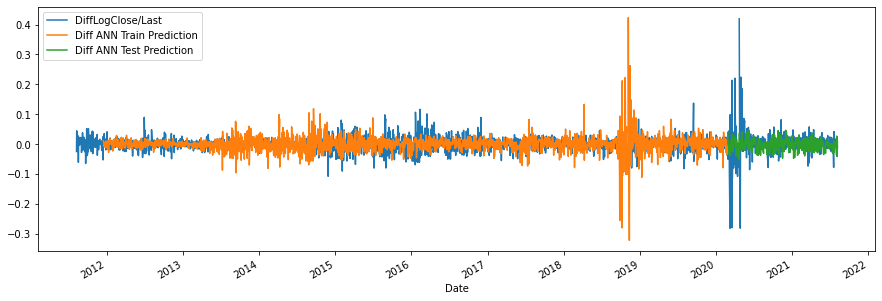

In [40]:
cols = ['DiffLogClose/Last',
        'Diff ANN Train Prediction',
        'Diff ANN Test Prediction']
df[cols].plot(figsize=(15, 5));

In [41]:
# Needed to compute un-differenced predictions
df['ShiftLogClose/Last'] = df['LogClose/Last'].shift(1)
prev = df['ShiftLogClose/Last']
df

,Close/Last,LogClose/Last,DiffLogClose/Last,ScaledLogReturn,Diff ANN Train Prediction,Diff ANN Test Prediction,ShiftLogClose/Last
Date,,,,,,,
2011-08-08,81.31,4.398269,NaN,NaN,NaN,NaN,NaN
2011-08-09,79.30,4.373238,-0.025031,-1.191010,NaN,NaN,4.398269
2011-08-10,82.89,4.417514,0.044276,2.137786,NaN,NaN,4.373238
2011-08-11,85.72,4.451086,0.033572,1.623651,NaN,NaN,4.417514
2011-08-12,85.38,4.447112,-0.003974,-0.179671,NaN,NaN,4.451086
...,...,...,...,...,...,...,...
2021-08-02,71.26,4.266335,-0.037054,-1.768478,NaN,-0.012096,4.303389
2021-08-03,70.56,4.256463,-0.009872,-0.462923,NaN,0.026455,4.266335
2021-08-04,68.15,4.221711,-0.034752,-1.657924,NaN,-0.007080,4.256463


In [42]:
# Last-known train value
last_train = train.iloc[-1]['LogClose/Last']

In [43]:
# prev[train_idx] + Ptrain

In [44]:
# 1-step forecast
df.loc[train_idx, '1step_train'] = prev[train_idx] + Ptrain
df.loc[test_idx, '1step_test'] = prev[test_idx] + Ptest

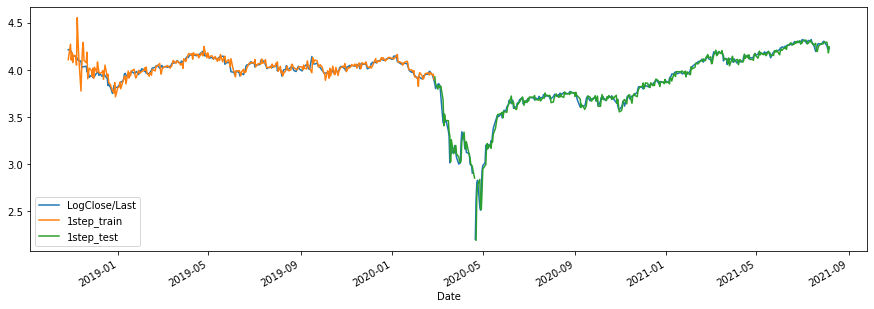

In [45]:
# plot 1-step forecast
df.iloc[-700:][['LogClose/Last', '1step_train', '1step_test']].plot(figsize=(15, 5));

In [46]:
# prev[test_idx] + np.concatenate((Ptrain, [0,0,0,0,0,0,0,0,0,0,0,0]))

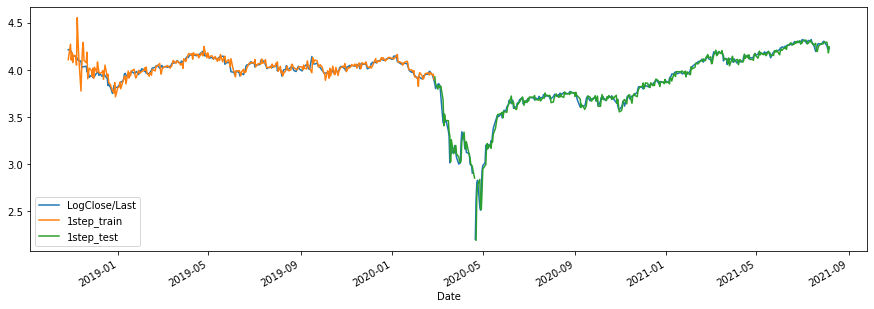

In [47]:
# plot 1-step forecast
df.iloc[-700:][['LogClose/Last', '1step_train', '1step_test']].plot(figsize=(15, 5));

In [48]:
# multi-step forecast
multistep_predictions = []

# first test input
last_x = Xtest[0]

while len(multistep_predictions) < Ntest:
  p = model.predict(last_x.reshape(1, -1))[0]
  
  # update the predictions list
  multistep_predictions.append(p)
  
  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

In [49]:
multistep_predictions = np.array(multistep_predictions)
multistep_predictions = scaler.inverse_transform(
    multistep_predictions.reshape(-1, 1)).flatten()

In [50]:
# save multi-step forecast to dataframe
df.loc[test_idx, 'multistep'] = last_train + np.cumsum(multistep_predictions)

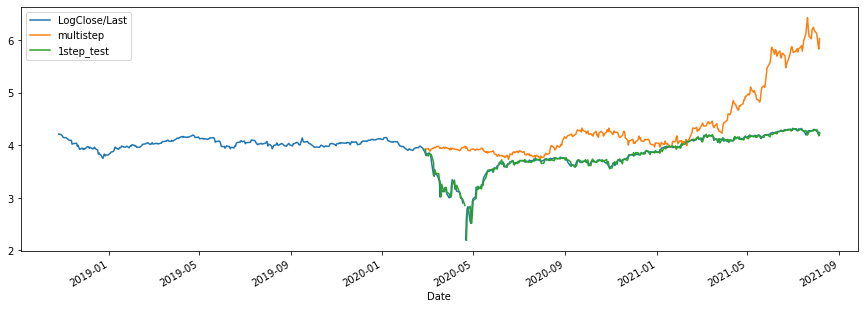

In [51]:
# plot 1-step and multi-step forecast
df.iloc[-700:][['LogClose/Last', 'multistep', '1step_test']].plot(figsize=(15, 5));

In [52]:
# test_log_pass = df.iloc[-Ntest:]['LogClose/Last']
# mape1 = mean_absolute_percentage_error(
#     test_log_pass, df.loc[test_idx, 'multistep'])
# print("multi-step MAPE:", mape1)
# mape2 = mean_absolute_percentage_error(
#     test_log_pass, df.loc[test_idx, 'multioutput'])
# print("multi-output MAPE:", mape2)

In [53]:
# make multi-output supervised dataset
Tx = T
Ty = Ntest
X = []
Y = []
for t in range(len(series) - Tx - Ty + 1):
  x = series[t:t+Tx]
  X.append(x)
  y = series[t+Tx:t+Tx+Ty]
  Y.append(y)

X = np.array(X).reshape(-1, Tx)
Y = np.array(Y).reshape(-1, Ty)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (2101, 91) Y.shape (2101, 365)


In [54]:
Xtrain_m, Ytrain_m = X[:-1], Y[:-1]
Xtest_m, Ytest_m = X[-1:], Y[-1:]

In [55]:
 #Basic ANN
i = Input(shape=(Tx,))
x = Dense(32, activation='relu')(i)
x = Dense(Ty)(x)
model = Model(i, x)

In [56]:
model.compile(
  loss='mse',
  optimizer='adam',
)

In [57]:
r = model.fit(
  Xtrain_m,
  Ytrain_m,
  epochs=700,
  validation_data=(Xtest_m, Ytest_m)
)

Epoch 1/700
66/66 [==============================] - 7s 102ms/step - loss: 1.9594 - val_loss: 6.3630
Epoch 2/700
66/66 [==============================] - 1s 10ms/step - loss: 1.9483 - val_loss: 6.3450
Epoch 3/700
66/66 [==============================] - 6s 97ms/step - loss: 1.8207 - val_loss: 6.3285
Epoch 4/700
66/66 [==============================] - 0s 6ms/step - loss: 1.9217 - val_loss: 6.3242
Epoch 5/700
66/66 [==============================] - 7s 102ms/step - loss: 1.7860 - val_loss: 6.3151
Epoch 6/700
66/66 [==============================] - 0s 5ms/step - loss: 1.8596 - val_loss: 6.3099
Epoch 7/700
66/66 [==============================] - 0s 5ms/step - loss: 1.8125 - val_loss: 6.3068
Epoch 8/700
66/66 [==============================] - 6s 99ms/step - loss: 1.9124 - val_loss: 6.3012
Epoch 9/700
66/66 [==============================] - 0s 6ms/step - loss: 1.8254 - val_loss: 6.3001
Epoch 10/700
66/66 [==============================] - 0s 6ms/step - loss: 1.9109 - val_loss: 6.2911
Ep

66/66 [==============================] - 0s 5ms/step - loss: 1.7869 - val_loss: 6.3278
Epoch 83/700
66/66 [==============================] - 0s 5ms/step - loss: 1.8320 - val_loss: 6.3279
Epoch 84/700
66/66 [==============================] - 7s 105ms/step - loss: 1.7678 - val_loss: 6.3224
Epoch 85/700
66/66 [==============================] - 0s 5ms/step - loss: 1.7695 - val_loss: 6.3324
Epoch 86/700
66/66 [==============================] - 6s 92ms/step - loss: 1.7664 - val_loss: 6.3296
Epoch 87/700
66/66 [==============================] - 0s 5ms/step - loss: 1.8126 - val_loss: 6.3321
Epoch 88/700
66/66 [==============================] - 6s 92ms/step - loss: 1.7744 - val_loss: 6.3270
Epoch 89/700
66/66 [==============================] - 1s 7ms/step - loss: 1.8412 - val_loss: 6.3282
Epoch 90/700
66/66 [==============================] - 0s 5ms/step - loss: 1.8335 - val_loss: 6.3298
Epoch 91/700
66/66 [==============================] - 6s 93ms/step - loss: 1.7941 - val_loss: 6.3331
Epoch 92

66/66 [==============================] - 7s 102ms/step - loss: 1.7340 - val_loss: 6.4148
Epoch 163/700
66/66 [==============================] - 0s 6ms/step - loss: 1.7903 - val_loss: 6.4120
Epoch 164/700
66/66 [==============================] - 7s 101ms/step - loss: 1.7896 - val_loss: 6.4174
Epoch 165/700
66/66 [==============================] - 0s 7ms/step - loss: 1.7760 - val_loss: 6.4177
Epoch 166/700
66/66 [==============================] - 7s 108ms/step - loss: 1.7691 - val_loss: 6.4173
Epoch 167/700
66/66 [==============================] - 6s 98ms/step - loss: 1.6947 - val_loss: 6.4183
Epoch 168/700
66/66 [==============================] - 0s 7ms/step - loss: 1.8258 - val_loss: 6.4219
Epoch 169/700
66/66 [==============================] - 7s 100ms/step - loss: 1.7520 - val_loss: 6.4197
Epoch 170/700
66/66 [==============================] - 0s 7ms/step - loss: 1.7059 - val_loss: 6.4219
Epoch 171/700
66/66 [==============================] - 7s 111ms/step - loss: 1.7712 - val_loss: 

66/66 [==============================] - 0s 7ms/step - loss: 1.7457 - val_loss: 6.4697
Epoch 243/700
66/66 [==============================] - 1s 9ms/step - loss: 1.7417 - val_loss: 6.4739
Epoch 244/700
66/66 [==============================] - 6s 96ms/step - loss: 1.7289 - val_loss: 6.4665
Epoch 245/700
66/66 [==============================] - 1s 10ms/step - loss: 1.7680 - val_loss: 6.4715
Epoch 246/700
66/66 [==============================] - 6s 97ms/step - loss: 1.7056 - val_loss: 6.4762
Epoch 247/700
66/66 [==============================] - 0s 6ms/step - loss: 1.7626 - val_loss: 6.4748
Epoch 248/700
66/66 [==============================] - 0s 6ms/step - loss: 1.7292 - val_loss: 6.4733
Epoch 249/700
66/66 [==============================] - 6s 95ms/step - loss: 1.7733 - val_loss: 6.4760
Epoch 250/700
66/66 [==============================] - 1s 8ms/step - loss: 1.7599 - val_loss: 6.4799
Epoch 251/700
66/66 [==============================] - 6s 99ms/step - loss: 1.7703 - val_loss: 6.4814

66/66 [==============================] - 6s 10ms/step - loss: 1.7783 - val_loss: 6.6172
Epoch 323/700
66/66 [==============================] - 6s 97ms/step - loss: 1.6862 - val_loss: 6.6189
Epoch 324/700
66/66 [==============================] - 0s 6ms/step - loss: 1.7839 - val_loss: 6.6189
Epoch 325/700
66/66 [==============================] - 0s 5ms/step - loss: 1.7195 - val_loss: 6.6224
Epoch 326/700
66/66 [==============================] - 7s 112ms/step - loss: 1.7294 - val_loss: 6.6267
Epoch 327/700
66/66 [==============================] - 7s 101ms/step - loss: 1.7685 - val_loss: 6.6328
Epoch 328/700
66/66 [==============================] - 6s 96ms/step - loss: 1.7201 - val_loss: 6.6340
Epoch 329/700
66/66 [==============================] - 0s 7ms/step - loss: 1.7636 - val_loss: 6.6434
Epoch 330/700
66/66 [==============================] - 7s 100ms/step - loss: 1.7945 - val_loss: 6.6422
Epoch 331/700
66/66 [==============================] - 0s 6ms/step - loss: 1.7610 - val_loss: 6.

66/66 [==============================] - 7s 101ms/step - loss: 1.7073 - val_loss: 6.7759
Epoch 403/700
66/66 [==============================] - 0s 5ms/step - loss: 1.7426 - val_loss: 6.7665
Epoch 404/700
66/66 [==============================] - 6s 98ms/step - loss: 1.6542 - val_loss: 6.7683
Epoch 405/700
66/66 [==============================] - 0s 5ms/step - loss: 1.7090 - val_loss: 6.7739
Epoch 406/700
66/66 [==============================] - 7s 102ms/step - loss: 1.7202 - val_loss: 6.7705
Epoch 407/700
66/66 [==============================] - 0s 6ms/step - loss: 1.7543 - val_loss: 6.7688
Epoch 408/700
66/66 [==============================] - 0s 7ms/step - loss: 1.7192 - val_loss: 6.7680
Epoch 409/700
66/66 [==============================] - 7s 14ms/step - loss: 1.7472 - val_loss: 6.7824
Epoch 410/700
66/66 [==============================] - 6s 99ms/step - loss: 1.6895 - val_loss: 6.7795
Epoch 411/700
66/66 [==============================] - 0s 5ms/step - loss: 1.7563 - val_loss: 6.77

66/66 [==============================] - 6s 94ms/step - loss: 1.7352 - val_loss: 6.8764
Epoch 483/700
66/66 [==============================] - 0s 6ms/step - loss: 1.7075 - val_loss: 6.8772
Epoch 484/700
66/66 [==============================] - 6s 94ms/step - loss: 1.7275 - val_loss: 6.8859
Epoch 485/700
66/66 [==============================] - 0s 5ms/step - loss: 1.7369 - val_loss: 6.8778
Epoch 486/700
66/66 [==============================] - 0s 6ms/step - loss: 1.7613 - val_loss: 6.8901
Epoch 487/700
66/66 [==============================] - 6s 94ms/step - loss: 1.7385 - val_loss: 6.8908
Epoch 488/700
66/66 [==============================] - 0s 5ms/step - loss: 1.7564 - val_loss: 6.8885
Epoch 489/700
66/66 [==============================] - 0s 5ms/step - loss: 1.7207 - val_loss: 6.8956
Epoch 490/700
66/66 [==============================] - 6s 97ms/step - loss: 1.7552 - val_loss: 6.8931
Epoch 491/700
66/66 [==============================] - 0s 5ms/step - loss: 1.7050 - val_loss: 6.8882


66/66 [==============================] - 7s 101ms/step - loss: 1.7532 - val_loss: 6.9229
Epoch 563/700
66/66 [==============================] - 0s 7ms/step - loss: 1.7241 - val_loss: 6.9285
Epoch 564/700
66/66 [==============================] - 6s 99ms/step - loss: 1.7427 - val_loss: 6.9186
Epoch 565/700
66/66 [==============================] - 1s 8ms/step - loss: 1.7385 - val_loss: 6.9320
Epoch 566/700
66/66 [==============================] - 6s 10ms/step - loss: 1.7158 - val_loss: 6.9387
Epoch 567/700
66/66 [==============================] - 6s 98ms/step - loss: 1.7294 - val_loss: 6.9259
Epoch 568/700
66/66 [==============================] - 0s 7ms/step - loss: 1.6902 - val_loss: 6.9283
Epoch 569/700
66/66 [==============================] - 6s 97ms/step - loss: 1.7104 - val_loss: 6.9172
Epoch 570/700
66/66 [==============================] - 1s 8ms/step - loss: 1.7619 - val_loss: 6.9141
Epoch 571/700
66/66 [==============================] - 6s 98ms/step - loss: 1.6940 - val_loss: 6.91

66/66 [==============================] - 0s 5ms/step - loss: 1.7608 - val_loss: 7.0340
Epoch 643/700
66/66 [==============================] - 7s 103ms/step - loss: 1.7362 - val_loss: 7.0421
Epoch 644/700
66/66 [==============================] - 0s 7ms/step - loss: 1.7544 - val_loss: 7.0110
Epoch 645/700
66/66 [==============================] - 6s 97ms/step - loss: 1.7114 - val_loss: 7.0554
Epoch 646/700
66/66 [==============================] - 6s 98ms/step - loss: 1.7608 - val_loss: 7.0355
Epoch 647/700
66/66 [==============================] - 0s 7ms/step - loss: 1.7043 - val_loss: 7.0497
Epoch 648/700
66/66 [==============================] - 6s 94ms/step - loss: 1.7816 - val_loss: 7.0271
Epoch 649/700
66/66 [==============================] - 0s 5ms/step - loss: 1.7001 - val_loss: 7.0492
Epoch 650/700
66/66 [==============================] - 0s 5ms/step - loss: 1.6839 - val_loss: 7.0353
Epoch 651/700
66/66 [==============================] - 7s 103ms/step - loss: 1.7385 - val_loss: 7.05

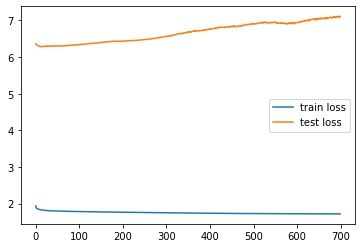

In [58]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend();

In [59]:
Ptrain = model.predict(Xtrain)
Ptest = model.predict(Xtest)

In [60]:
Ptrain.shape, Ptest.shape

((2100, 365), (365, 365))

In [61]:
Ptrain = Ptrain[:,0]
Ptest = Ptest[0]

In [62]:
# unscale
Ptest = scaler.inverse_transform(Ptest.reshape(-1, 1)).flatten()

In [63]:
# save multi-output forecast to dataframe
df.loc[test_idx, 'multioutput'] = last_train + \
  np.cumsum(Ptest)

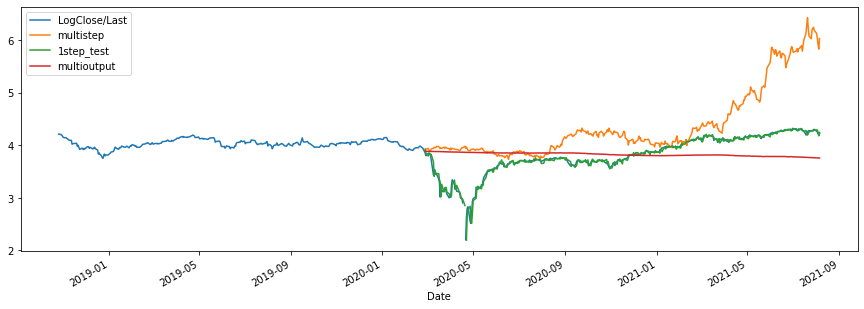

In [64]:
# plot all forecasts
cols = ['LogClose/Last', 'multistep', '1step_test', 'multioutput']
df.iloc[-700:][cols].plot(figsize=(15, 5));

In [65]:
# MAPE
test_log_pass = df.iloc[-Ntest:]['LogClose/Last'].notna()

mape1 = mean_absolute_percentage_error(
    test_log_pass, df.loc[test_idx, 'multistep'])
print("multi-step MAPE:", mape1)
mape2 = mean_absolute_percentage_error(
    test_log_pass, df.loc[test_idx, 'multioutput'])
print("multi-output MAPE:", mape2)
# mape0 = mean_absolute_percentage_error(
#     test_log_pass, df.loc[test_idx, '1step_test'])
# print("1step_test MAPE:", mape0)

multi-step MAPE: 49132443121066.99
multi-output MAPE: 47718198643246.29


In [66]:
df.head(10)

,Close/Last,LogClose/Last,DiffLogClose/Last,ScaledLogReturn,Diff ANN Train Prediction,Diff ANN Test Prediction,ShiftLogClose/Last,1step_train,1step_test,multistep,multioutput
Date,,,,,,,,,,,
2011-08-08,81.31,4.398269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-09,79.30,4.373238,-0.025031,-1.191010,NaN,NaN,4.398269,NaN,NaN,NaN,NaN
2011-08-10,82.89,4.417514,0.044276,2.137786,NaN,NaN,4.373238,NaN,NaN,NaN,NaN
2011-08-11,85.72,4.451086,0.033572,1.623651,NaN,NaN,4.417514,NaN,NaN,NaN,NaN
2011-08-12,85.38,4.447112,-0.003974,-0.179671,NaN,NaN,4.451086,NaN,NaN,NaN,NaN
2011-08-15,87.88,4.475972,0.028860,1.397365,NaN,NaN,4.447112,NaN,NaN,NaN,NaN
2011-08-16,86.65,4.461877,-0.014095,-0.665776,NaN,NaN,4.475972,NaN,NaN,NaN,NaN
2011-08-17,87.58,4.472553,0.010676,0.523960,NaN,NaN,4.461877,NaN,NaN,NaN,NaN
2011-08-18,82.38,4.411343,-0.061210,-2.928678,NaN,NaN,4.472553,NaN,NaN,NaN,NaN


In [71]:
from sklearn.metrics import mean_squared_error

mspe1 = mean_squared_error(
    test_log_pass, df.loc[test_idx, 'multistep'])
print("multi-step MSPE:", mspe1)
mspe2 = mean_squared_error(
    test_log_pass, df.loc[test_idx, 'multioutput'])
print("multi-output MSPE:", mspe2)

multi-step MSPE: 11.903171
multi-output MSPE: 8.007927


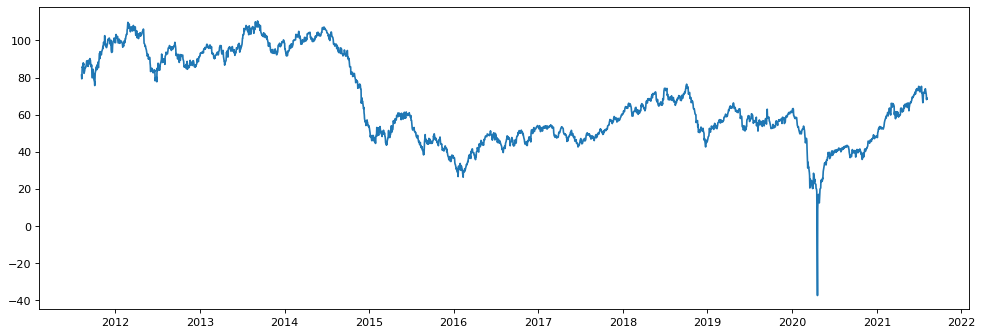

In [68]:
from matplotlib.pyplot import figure

figure(figsize=(15,5), dpi=80)
plt.plot(df.iloc[:][['Close/Last']])
plt.savefig('raw_data_plot.png')

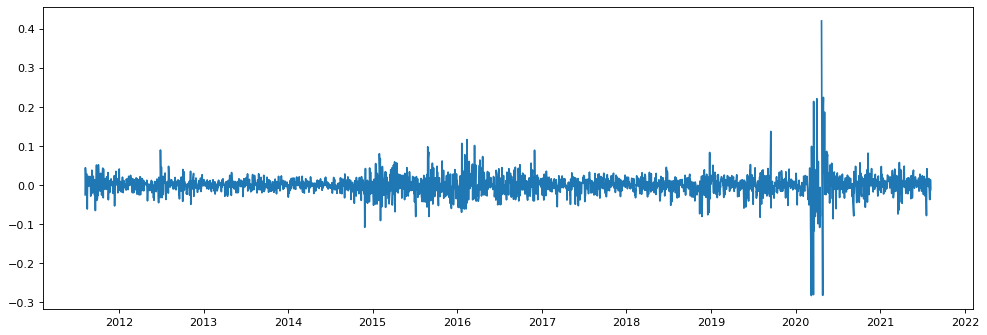

In [69]:
figure(figsize=(15,5), dpi=80)
# cols = ['DiffLogClose/Last 	']
# plt.plot(df[cols])

cols = ['DiffLogClose/Last',]
#         'Diff ANN Train Prediction',
#         'Diff ANN Test Prediction']
plt.plot(df[cols])

plt.savefig('LOGraw_data_error_plot.png')

In [70]:
# Make supervised dataset
series = df['ScaledLogReturn'].dropna().to_numpy()

T = 10
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)


Xtrain, Ytrain = X[Ntest:], Y[Ntest:]
Xtest, Ytest = X[:Ntest], Y[:Ntest]


# Basic ANN
i = Input(shape=(T,))
x = Dense(32, activation='relu')(i)
x = Dense(1)(x)
model = Model(i, x)



model.compile(
  loss='mse',
  optimizer='adam',
)


r = model.fit(
  Xtrain,
  Ytrain,
  epochs=600,
  validation_data=(Xtest, Ytest)
)


figure(figsize=(15,5), dpi=80)
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend();
plt.savefig('ann_error_plot.png')

train_idx[:T+1] = False # first T+1 values are not predictable


Ptrain = model.predict(Xtrain)
Ptest = model.predict(Xtest)

Ptrain = scaler.inverse_transform(Ptrain).flatten()
Ptest = scaler.inverse_transform(Ptest).flatten()


# Store diff predictions
df.loc[train_idx, 'Diff ANN Train Prediction'] = Ptrain
df.loc[test_idx, 'Diff ANN Test Prediction'] = Ptest

cols = ['DiffLogClose/Last',
        'Diff ANN Train Prediction',
        'Diff ANN Test Prediction']
df[cols].plot(figsize=(15, 5));

# Last-known train value
last_train = train.iloc[-1]['LogClose/Last']


# 1-step forecast
df.loc[train_idx, '1step_train'] = prev[train_idx] + Ptrain
df.loc[test_idx, '1step_test'] = prev[test_idx] + Ptest


# plot 1-step forecast
df.iloc[-700:][['LogClose/Last', '1step_train', '1step_test']].plot(figsize=(15, 5));




X.shape (2546, 10) Y.shape (2546,)
Epoch 1/600
69/69 [==============================] - 6s 87ms/step - loss: 3.5810 - val_loss: 0.9053
Epoch 2/600
69/69 [==============================] - 0s 5ms/step - loss: 2.8481 - val_loss: 0.8216
Epoch 3/600
69/69 [==============================] - 0s 6ms/step - loss: 2.0766 - val_loss: 0.8037
Epoch 4/600
69/69 [==============================] - 6s 90ms/step - loss: 2.0694 - val_loss: 0.7932
Epoch 5/600
69/69 [==============================] - 0s 6ms/step - loss: 1.6608 - val_loss: 0.7870
Epoch 6/600
69/69 [==============================] - 6s 86ms/step - loss: 2.2369 - val_loss: 0.7852
Epoch 7/600
69/69 [==============================] - 1s 8ms/step - loss: 1.8309 - val_loss: 0.7845
Epoch 8/600
69/69 [==============================] - 6s 95ms/step - loss: 1.6944 - val_loss: 0.7858
Epoch 9/600
69/69 [==============================] - 0s 5ms/step - loss: 1.4876 - val_loss: 0.7848
Epoch 10/600
69/69 [==============================] - 6s 86ms/step - l

KeyboardInterrupt: 